# Machine Learning - Wine Dataset

Pada kernel ini, kita akan coba bereksperimen dengan dataset wine yang disediakan oleh library sklearn untuk kita mengeksplorasi bidang _machine learning_.

Pertama-tama, mari kita _import library_ yang akan kita butuhkan nanti:

In [1]:
import pandas as pd
import sklearn
import sklearn.datasets as datasets
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

Kemudian, mari kita load data _wine_ yang akan kita gunakan di dalam kernel ini:

In [2]:
wine = datasets.load_wine()
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

Output diatas menunjukkan keterangan dataset wine yang sedang kita gunakan. Dapat kita lihat pada dataset ini memiliki 13 fitur yang dapat kita gunakan dan satu kolom _class_ yang akan menjadi target prediksi kita. Tiga kelas target kita adalah **class_0**, **class_1**, dan **class_2**.

Selanjutnya, mari kita print nama fitur dan target yang kita miliki.

In [3]:
for key,value in wine.items():
    if key == 'data' or key == 'DESCR': continue # Data tidak perlu di print karena tampilannya akan jelek.
    print(key,'\n',value,'\n')

target 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 

target_names 
 ['class_0' 'class_1' 'class_2'] 

feature_names 
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] 



Kita dapat lihat bahwa terdapat dua buah array bernama target dan target_name. Itulah kelas prediksi kita. Berikutnya mari kita ubah data wine ini menjadi bentuk dataframe agar mudah diolah.

In [4]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine['target']
df['class'] = df['target'].map(lambda x: wine['target_names'][x])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


Bagus, sekarang kita sudah memiliki data _wine_ dalam bentuk dataframe pandas. Dalam bentuk ini, pengolahan akan jauh lebih mudah dan kita dapat melakukan beberapa _overview_ terhadap data wine kita dengan lebih mudah. Beberapa contoh fungsi yang berguna adalah:

`head()` dan `tail()` untuk melihat 5 data teratas dan terbawah, seperti _snippet_ kode sebelumnya;
`describe()` untuk melihat statikstik dasar seperti rata-rata dan median; dan
`info()` untuk melihat struktur data dan kondisi null data.

In [5]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
target                          178 non-null int64
class                           178 non-null object
dtypes: float64(13), int64(1), object(1)
memory usage: 21.0+ KB


Kita dapat lihat bahwa kita memiliki 178 baris dan tidak ada baris yang memiliki nilai null. Bagus! Artinya, kita tidak perlu melakukan _data cleansing_. Fungsi `describe()` juga menjelaskan *mean*, *median*, dan kuartil untuk setial kolom.

Selanjutnya, mari kita coba visualisasi beberapa data diatas agar kita dapat melihat data secara lebih mendalam.

Mari kita ingat konteks pertanyaan kita: **Fitur apa sajakah yang dapat menjelaskan kategori atau kelas dari suatu wine?**

Saya penasaran dengan suatu variabel yaitu **Malic Acid**, terlihat bahwa perbedaan mean dan median dari variabel tersebut cukup signifikan, dugaan saya variabel tersebut memiliki outlier. **Ash** juga memiliki pernilai minimum dan maximum yang perbedaannya cukup jauh dari selisih standar deviasi dan mean. Mari kita coba lihat menggunakan box plot:

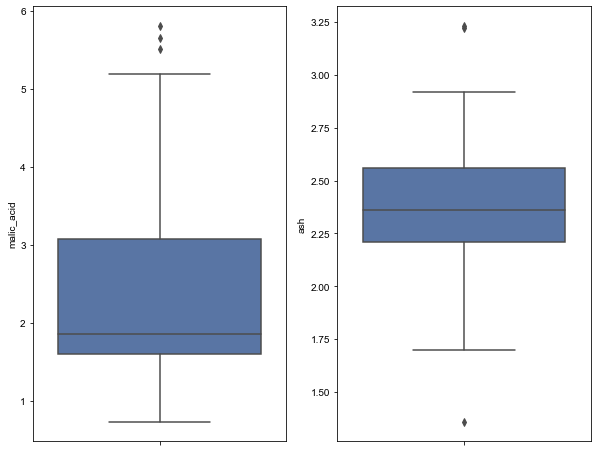

In [7]:
f, axes = plt.subplots(1, 2, figsize=(10,8))
#f.set_figwidth(15)
sn.set(style="whitegrid")
sn.boxplot(x=df["malic_acid"], orient='v', ax = axes[0])
sn.boxplot(x=df["ash"], orient='v', ax = axes[1])

Dapat dilihat bahwa keduanya memiliki outlier, meskipun hanya sedikit. Tetap saja, kita sebisa mungkin menghindari outlier di dalam data kita karena dengan adanya outlier, performa model kita dapat menurun. Apabila kita akan menggunakan kolom ini untuk training dan testing, maka kita perlu menghapus outliernya.

Untuk yang berikutnya, kita ingin melihat korelasi dari setiap kolom terutama terhadap kolom target. Dengan korelasi yang tinggi, kita dapat memilih kolom tersebut sebagai fitur, karena memiliki hubungan yang kuat.

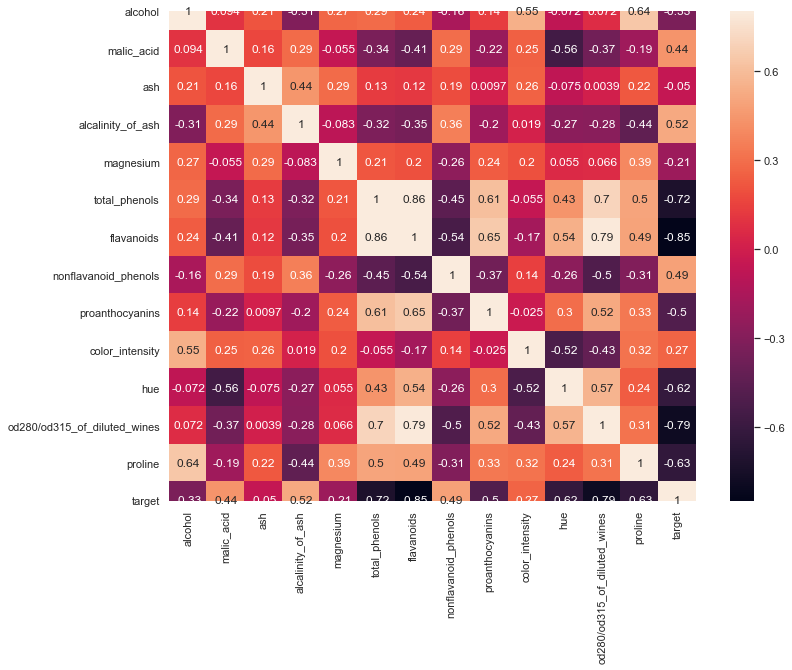

In [8]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sn.heatmap(corrmat, annot=True, vmax=.8, square=True);

Jujur saja, saya kurang paham konteks wine karena saya tidak minum alkohol (tolong jelaskan apabila ada yang tahu ya, maksudnya ini apa, hehe :p), tapi dapat dilihat bahwa tampaknya kolom `total_phenol`, `flavanoids`, dan `od280/od315_of_diluted_wines` memiliki korelasi yang cukup tinggi terhadap target. Disamping itu, `proline` juga memiliki korelasi yang cukup tinggi. Saya akan coba jadikan keempat kolom tersebut sebagai fitur nanti.

#### Note:
Seringkali kita menjumpai permasalahan seperti ini; kita tidak memahami konteks dari data yang kita miliki. Dengan adanya konteks, akan lebih mudah untuk kita membuat asumsi dan menarik kesimpulan dari apa yang kita miliki. Apabila bisa, kita harus coba konsultasikan data kita kepada orang yang mengerti, karena akan membantu kita melakukan berbagai tahap, seperti seleksi fitur dan ekstraksi fitur. Untuk percobaan berikutnya, saya akan gunakan data yang lebih saya mengerti sehingga saya dapat berasumsi dengan lebih baik.

In [9]:
corr_target = abs(corrmat["target"])
features_set = corr_target[corr_target > 0.5]
features_set

alcalinity_of_ash               0.517859
total_phenols                   0.719163
flavanoids                      0.847498
hue                             0.617369
od280/od315_of_diluted_wines    0.788230
proline                         0.633717
target                          1.000000
Name: target, dtype: float64

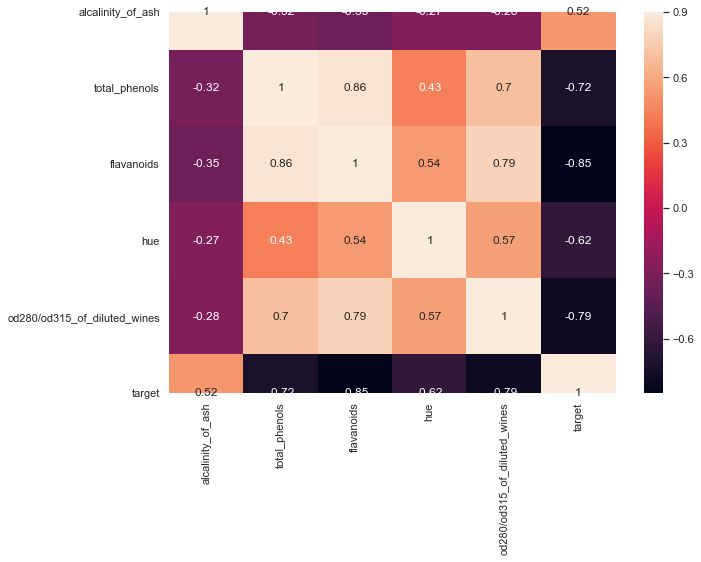

In [10]:
df_features = df[['alcalinity_of_ash', 'total_phenols', 'flavanoids', 'hue', 'od280/od315_of_diluted_wines', 'target']]
corrmat_set1 = df_features.corr()
f, ax = plt.subplots(figsize=(10, 7))
sn.heatmap(corrmat_set1, annot=True, vmax=.9);

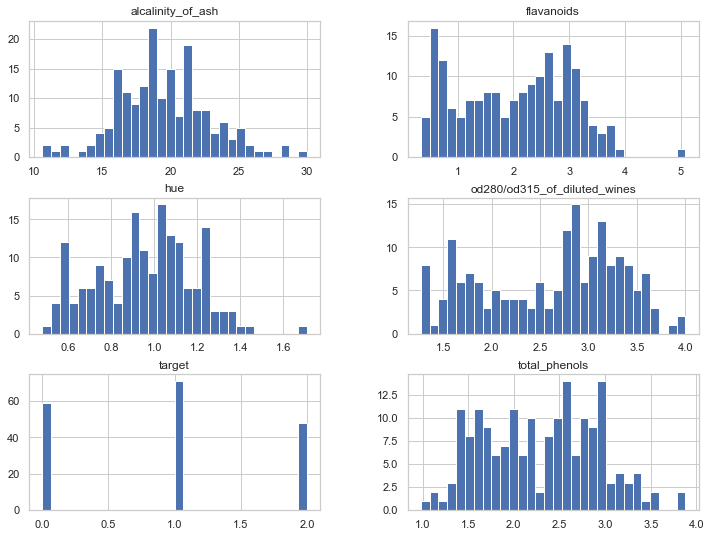

In [11]:
%matplotlib inline
df_features.hist(bins=30, figsize=(12,9))
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
df_features = df_features[['alcalinity_of_ash', 'flavanoids', 'target']]
data_train, data_test, label_train, label_test = train_test_split(df_features.drop(['target'], axis=1), df_features['target'], test_size=0.2)

print(len(data_train),' samples in training data\n',
      len(data_test),' samples in test data\n', )

142  samples in training data
 36  samples in test data



In [13]:
# X_train: Dataset training
# X_val: Dataset testing
# y_train: Target label training
# y_val: Target label testing
def plot_learning_curve(model, X_train, X_val, y_train, y_val):
    train_score, val_score = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_score.append(model.score(X_train,
                                      y_train))
        val_score.append(model.score(X_val,
                                     y_val))
        
    plt.plot(np.sqrt(train_score), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_score), "b-", linewidth=3, label="val")

/Users/mharitsnf/Documents/Intro-to-AI-ML/venv/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/Users/mharitsnf/Documents/Intro-to-AI-ML/venv/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/Users/mharitsnf/Documents/Intro-to-AI-ML/venv/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/Users/mharitsnf/Documents/Intro-to-AI-ML/venv/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/Users/mharitsnf/Documents/Intro-to-AI-ML/venv/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/Users/mha

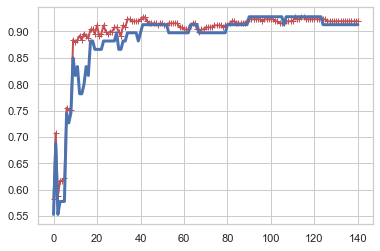

In [15]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
plot_learning_curve(naive_bayes, data_train, data_test, label_train, label_test)

/Users/mharitsnf/Documents/Intro-to-AI-ML/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


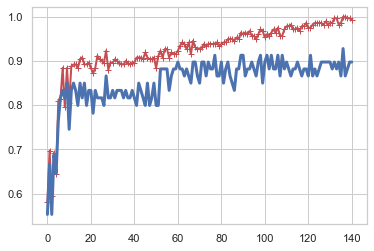

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
plot_learning_curve(rfc, data_train, data_test, label_train, label_test)

### Cara lebih mudah dan simpel untuk melakukan prediksi dan training

In [17]:
naive_bayes = GaussianNB()
naive_bayes.fit(data_train, label_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
result = naive_bayes.predict(data_test)
print("Prediction Result:")
print(result)
print("Actual label:")
print(label_test)

Prediction Result:
[1 0 1 1 0 2 1 2 2 1 2 1 1 1 1 0 1 0 0 2 1 1 2 1 0 1 0 1 0 0 0 1 2 0 2 0]
Actual label:
77     1
41     0
117    1
115    1
26     0
134    2
158    2
139    2
169    2
121    1
96     1
24     0
119    1
150    2
67     1
36     0
118    1
13     0
97     1
140    2
125    1
95     1
159    2
62     1
47     0
60     1
53     0
72     1
3      0
65     1
8      0
68     1
143    2
11     0
136    2
16     0
Name: target, dtype: int64
